# MNIST Handwritten Digit Recognition
Depends on MNIST in CSV format: http://yann.lecun.com/exdb/mnist/
    


In [12]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt

import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical, normalize



In [3]:
#!ls
#!pwd
#!ls ..
#!ls ../input
#example_file = "../input/sample_submission.csv"
#df = pd.read_csv(example_file)
#print(df.head())

In [4]:
#constants
#base_path = '../input/'
base_path = ''
train_file = base_path + 'train.csv'
test_file = base_path + 'test.csv'

num_classes = 10
dev_set_fraction = 0.05

In [5]:
#explore
df = pd.read_csv(train_file)
print(df.head())
print("shape: " + str(df.shape))
df.describe()

dft = pd.read_csv(test_file)
print(dft.head())
print("shape: " + str(dft.shape))
dft.describe()


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [45]:
# extract
df = pd.read_csv(train_file)

m = df.shape[0]
pixelnum = df.shape[1]-1

# randomize so we can split again to get a dev set
df = df.sample(frac=1).reset_index(drop=True)

x_train = df.iloc[:, 1:pixelnum+1].values
y_train = to_categorical(df['label'].values, num_classes=10)

x_train = normalize(x_train)

split = int(m - m*dev_set_fraction)
x = x_train[:split, :]
y = y_train[:split, :]
x_dev = x_train[split:, :]
y_dev = y_train[split:, :]

print("x: {}, y: {}".format(x.shape, y.shape))

print("x_dev: {}, y_dev: {}".format(x_dev.shape, y_dev.shape))

dftest = pd.read_csv(test_file)
x_test = dftest.values
print("x_test: {}".format(x_test.shape))

x: (39900, 784), y: (39900, 10)
x_dev: (2100, 784), y_dev: (2100, 10)
x_test: (28000, 784)


In [7]:
# model structure
model = Sequential()

model.add(Dense(784, activation='tanh', name="d1",  input_dim=pixelnum))
model.add(Dense(392, activation='tanh', name="d2"))
model.add(Dense(num_classes, activation='softmax', name="d3"))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [46]:
#fit
model.fit(x, y,
          batch_size=128,
          epochs=3,
          verbose=1
          ,validation_data=(x_dev, y_dev)
         )
         
score = model.evaluate(x_dev, y_dev, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 39900 samples, validate on 2100 samples
Epoch 1/3
39900/39900 [==============================] - 10s 253us/step - loss: 0.3390 - acc: 0.9091 - val_loss: 0.2938 - val_acc: 0.9167
Epoch 2/3
39900/39900 [==============================] - 10s 249us/step - loss: 0.2562 - acc: 0.9250 - val_loss: 0.2646 - val_acc: 0.9286
Epoch 3/3
39900/39900 [==============================] - 10s 241us/step - loss: 0.2228 - acc: 0.9349 - val_loss: 0.2404 - val_acc: 0.9333
Test loss: 0.24037487262771243
Test accuracy: 0.933333333106268


In [9]:
y_test = model.predict(x_test)
y_test = np.argmax(y_test, axis=1).astype(int)
y_test = pd.DataFrame({"ImageId": np.arange(y_test.shape[0])+1,"Label": y_test})
print(y_test.head())
y_test.to_csv("kaggle_submission.csv", sep=",", index=False)

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      2
4        5      3


In [33]:
r = np.random.rand(3000) * 1000
nr = normalize(r)
print(np.mean(r))
print(np.mean(nr))
print(np.std(r))
print(np.std(nr))
print(np.min(r))
print(np.min(nr))
print(np.max(r))
print(np.max(nr))





501.7864537492176
0.01585919005351169
286.1976995752747
0.00904540901120171
0.10806665401985605
3.4154959579768494e-06
999.8470469472018
0.03160062258257569


In [37]:
print(nr.reshape(3000).shape)
print(r.shape)

(3000,)
(3000,)


(array([278., 298., 306., 311., 292., 334., 273., 310., 302., 296.]),
 array([3.41549596e-06, 3.16313620e-03, 6.32285691e-03, 9.48257762e-03,
        1.26422983e-02, 1.58020190e-02, 1.89617397e-02, 2.21214605e-02,
        2.52811812e-02, 2.84409019e-02, 3.16006226e-02]),
 <a list of 10 Patch objects>)

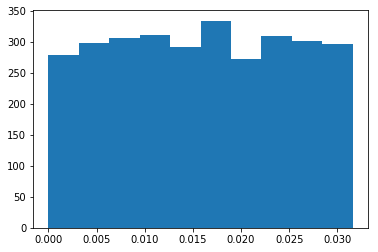

In [38]:
plt.hist(nr.reshape(3000))

(array([278., 298., 306., 311., 292., 334., 273., 310., 302., 296.]),
 array([1.08066654e-01, 1.00081965e+02, 2.00055863e+02, 3.00029761e+02,
        4.00003659e+02, 4.99977557e+02, 5.99951455e+02, 6.99925353e+02,
        7.99899251e+02, 8.99873149e+02, 9.99847047e+02]),
 <a list of 10 Patch objects>)

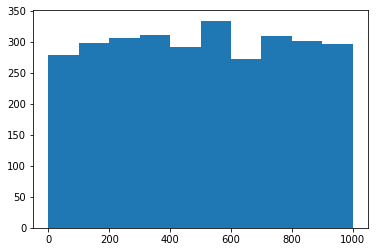

In [39]:
plt.hist(r)

In [44]:
print(x_train.shape)
print(normalize(x_train).shape)
print(np.max(normalize(x_train)))

(42000, 784)
(42000, 784)
0.27392289463802594
